In [15]:
import pandas as pd
df = pd.read_excel('raw data/CuC Sample.xlsx', sheet_name='registrations')
df2 = pd.read_excel('raw data/Philippines CuC Data - 2024 10 03.xlsx', sheet_name='_fact_student_registrations')
df3 = pd.read_excel('raw data/Uganda - 2024 10 02(v1).xlsx', sheet_name='ug_fact_student_registrations')

In [51]:
df.head()

,Gender,DeleteReasonId,CreatedOn,AcademicYearFull,AcademicTermDetailsId,SchoolName,ClassName,CuCStatus,AcademicYearId,ChildID,...,Age,EoR1,EoR2,EoR3/Endline,IsCurrentChildrenAcademicTable,IsActiveChildrenAcademicTable - Copy,IsActiveChildTable - Copy,IsActiveSchool,IsActiveClass,FullName
0,NaN,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,NaN,NaN,True,7,3670,...,NaN,No,Yes,Yes,True,True,True,True,True,NaN
1,NaN,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,NaN,NaN,True,7,3671,...,NaN,No,Yes,Yes,True,True,True,True,True,NaN
2,NaN,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,NaN,NaN,True,7,3672,...,NaN,No,Yes,Yes,True,True,True,True,True,NaN
3,NaN,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,NaN,NaN,True,7,3675,...,NaN,No,Yes,Yes,True,True,True,True,True,NaN
4,NaN,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,NaN,NaN,True,7,3677,...,NaN,No,Yes,Yes,True,True,True,True,True,NaN


In [49]:
columns = [list(df.columns), list(df2.columns), list(df3.columns)]
common_columns = list(set(columns[0]).intersection(set(columns[1])).intersection(set(columns[2])))
common_columns.sort()
print(common_columns)
print(list(set(columns[0]) - set(common_columns)))

['AcademicTermDetailsId', 'AcademicYearId', 'Age', 'ChildID', 'ClassID', 'Cycle', 'DeleteReasonId', 'EoR1', 'EoR2', 'EoR3/Endline', 'Gender', 'Grade', 'SchoolID']
['ProjectName', 'IsActiveChildrenAcademicTable', 'AcademicYearFull', 'LastName', 'StateName', 'CreatedOn_Child_Table', 'AcademicYear', 'ModifiedOn_Child_Table', 'DeleteReason', 'CuCStatus', 'FirstName', 'ModifiedOn_Child_Academic_Table', 'IsActiveChildTable', 'IsCurrentChildrenAcademicTable', 'CreatedOn', 'SchoolName', 'DistrictName', 'IsActiveChildrenAcademicTable - Copy', 'IsActiveClass', 'ClassName', 'IsActiveChildTable - Copy', 'Batch', 'FullName', 'IsActiveSchool', 'Term', 'CreatedOn_Child_Academic_Table']


In [109]:
numerical_summary = df.describe()
missing_values = df.isnull().sum()

categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
categorical_summary = df[categorical_columns].nunique()

missing_values, categorical_summary

In [111]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned.head()

,DeleteReasonId,CreatedOn,AcademicYearFull,AcademicTermDetailsId,CuCStatus,AcademicYearId,ChildID,SchoolID,ClassID,IsActiveChildrenAcademicTable,...,Batch,Cycle,EoR1,EoR2,EoR3/Endline,IsCurrentChildrenAcademicTable,IsActiveChildrenAcademicTable - Copy,IsActiveChildTable - Copy,IsActiveSchool,IsActiveClass
0,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,True,7,3670,75,549,True,...,Batch 2,Cycle 1,No,Yes,Yes,True,True,True,True,True
1,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,True,7,3671,75,549,True,...,Batch 2,Cycle 1,No,Yes,Yes,True,True,True,True,True
2,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,True,7,3672,75,549,True,...,Batch 2,Cycle 1,No,Yes,Yes,True,True,True,True,True
3,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,True,7,3675,75,549,True,...,Batch 2,Cycle 1,No,Yes,Yes,True,True,True,True,True
4,NaN,2023-05-08,2023-Sarangani-Batch 2-Cycle 1,128,True,7,3677,75,549,True,...,Batch 2,Cycle 1,No,Yes,Yes,True,True,True,True,True


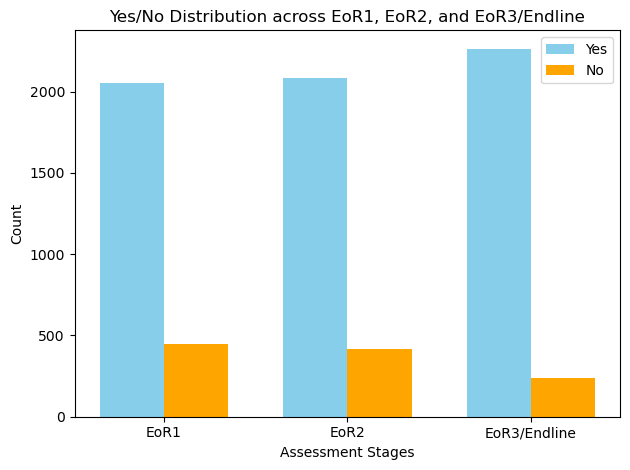

In [118]:
import matplotlib.pyplot as plt

df_plot = df
categories = ['EoR1', 'EoR2', 'EoR3/Endline']
yes_counts = [df_plot['EoR1'].eq('Yes').sum(), df_plot['EoR2'].eq('Yes').sum(), df_plot['EoR3/Endline'].eq('Yes').sum()]
no_counts = [df_plot['EoR1'].eq('No').sum(), df_plot['EoR2'].eq('No').sum(), df_plot['EoR3/Endline'].eq('No').sum()]
bar_width = 0.35
index = range(len(categories))

plt.bar(index, yes_counts, bar_width, label='Yes', color='skyblue')
plt.bar([i + bar_width for i in index], no_counts, bar_width, label='No', color='orange')
plt.xlabel('Assessment Stages')
plt.ylabel('Count')
plt.title('Yes/No Distribution across EoR1, EoR2, and EoR3/Endline')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()
plt.tight_layout()
plt.show()


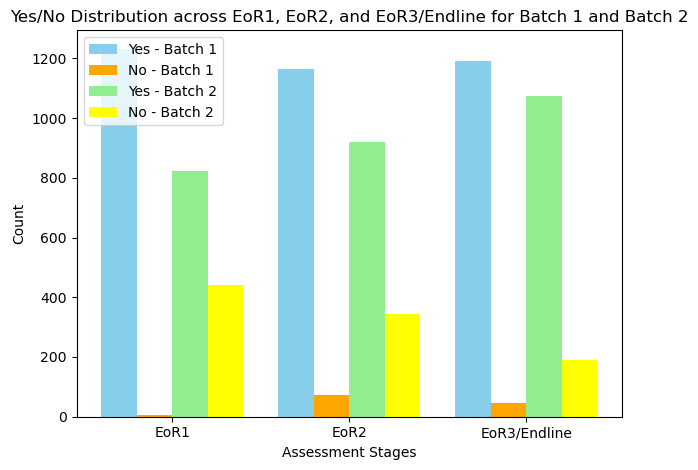

In [122]:
df_batch1 = df[df['Batch'] == 'Batch 1']
df_batch2 = df[df['Batch'] == 'Batch 2']

categories = ['EoR1', 'EoR2', 'EoR3/Endline']
yes_counts_batch1 = [df_batch1[category].eq('Yes').sum() for category in categories]
no_counts_batch1 = [df_batch1[category].eq('No').sum() for category in categories]
yes_counts_batch2 = [df_batch2[category].eq('Yes').sum() for category in categories]
no_counts_batch2 = [df_batch2[category].eq('No').sum() for category in categories]
bar_width = 0.2
index = range(len(categories))

# Plotting
plt.bar(index, yes_counts_batch1, bar_width, label='Yes - Batch 1', color='skyblue')
plt.bar([i + bar_width for i in index], no_counts_batch1, bar_width, label='No - Batch 1', color='orange')
plt.bar([i + bar_width * 2 for i in index], yes_counts_batch2, bar_width, label='Yes - Batch 2', color='lightgreen')
plt.bar([i + bar_width * 3 for i in index], no_counts_batch2, bar_width, label='No - Batch 2', color='yellow')

plt.xlabel('Assessment Stages')
plt.ylabel('Count')
plt.title('Yes/No Distribution across EoR1, EoR2, and EoR3/Endline for Batch 1 and Batch 2')
plt.xticks([i + bar_width * 1.5 for i in index], categories)
plt.legend()
plt.tight_layout()
plt.show()